In [ ]:
# Finally we have performed a study of our Sample 3, starting with an energy density study 
# similar to the one made for Sample 2, followed by a predicted PWN flux-angular size study and
# halo population estimation. A map in galactic coordinates of the predicted PWNe population at 
# 1 TeV has been made too.

In [ ]:
##################################### ENERGY DENSITY PLOT ####################################
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
#from scipy.stats import norm

#from chart_studio.plotly import plot, iplot
#import plotly.plotly as py
#import plotly.tools as tls
import matplotlib.colors as colors

%matplotlib inline
#%config InlineBackend.figure_format = 'png'

from scipy.interpolate import interp1d

# We read the data file
data = np.genfromtxt('Ageless500kyrnolabels.txt', dtype=np.str)

Edot = data.T[28].astype(np.float)# Array of Edot in erg/s
tau = data.T[26].astype(np.float) # Array of characteristic age (tau) in yr (ALREADY IN YEARS)
Pdot = data.T[22].astype(np.float) # Array of period derivative in s/s
P = data.T[20].astype(np.float) # Array of period in s
names = data.T[6].astype(str) # Array of names
distance = data.T[24].astype(np.float) # Array of distance IN KPC!
lii = data.T[16].astype(np.float) # Array of lii in degrees
bii = data.T[18].astype(np.float) # Array of bii in degrees
sizebool = data.T[1].astype(np.float) # Array of boolean
discoveredbool = data.T[3].astype(np.float) # Array of boolean
size = data.T[30].astype(np.float) # Array of size (0 if its unkwown) in pc

# WE CONVERT DISTANCE FROM KPC TO PC
distance = distance * 10**3

################################## FUNCTIONS ###############
# Function which returns tau0 from equation 2.3 of the report
def ftau0(tau,P,Pzero):
    return tau*(Pzero/P)**2

# Function which returns Edot0 from Equation 2.1 of the report
def fEdot(Edott,tt,ttau0):
    return Edott*(1 + tt/ttau0)**(2)

# Radius evolution complete for all stages, including diffusion
def fcalcR(Edot0bis,tau0bis,ft):
    rtp = -1
    norm1 = (1.1*(Edot0bis/(10**38))**(0.2) * (tau0bis/(10**3))**(1.2) * (7000/tau0bis) * 1/(7000)**(0.3))/2 * 20000**(0.3)
    D = 8.32*10**27 #cm^2/s  8.32x10^27
    if ft <= tau0bis:
        #print('Case 1:', 1.1 * ( Edot0bis/(10**38) )**(0.2) * (ft/(10**3))**(1.2), ft)
        rtp = 1.1 * ( Edot0bis/(10**38) )**(0.2) * (ft/(10**3))**(1.2) # IN PARSECS
    elif tau0bis < ft <= 7000:
        #return 1.1 * (Edot0/(10**38))**(0.2) * (tau0/(10**3))**(1.2) * (1/tau0) * t
        rt = 1.1 * (Edot0bis/(10**38))**(0.2) * (tau0bis/(10**3))**(1.2) 
        rtp = rt * (ft/tau0bis)  # IN PARSECS
        #print('Case 2:', rtp,ft)
    elif 7000 < ft <= 20000:
        rtp = (1.1 * (Edot0bis/(10**38))**(0.2) * (tau0bis/(10**3))**(1.2) * (7000/tau0bis) * 1/(7000)**(0.3))/2 * ft**(0.3)
        # IN PARSECS
    elif 20000 < ft <= 30000: 
        delta = ft - 20000
        rtp =  (norm1/(3.24078*10**(-19))) + 2 * np.sqrt(D * delta * 365*24*3600 )
        # but delta is in seconds and D in years so we convert it (and radius is in cm)
        rtp = rtp * 3.24078*10**(-19)   # we convert cm into pc
    elif 30000 < ft:
        delta = 30000 - 20000
        rtp =  (norm1/(3.24078*10**(-19))) + 2 * np.sqrt(D * delta * 365*24*3600 )
         # but delta is in seconds and D in years so we convert it (and radius is in cm)
        rtp = rtp * 3.24078*10**(-19)   # we convert cm into pc
        #print(ft,(norm1/(3.24078*10**(-19))), 2 * np.sqrt(D * delta * 365*24*3600 ))
    return rtp
print('Data charged')

In [2]:
################################### OBTAIN ENERGY DENSITY ###########################################
# We first obtain tau0 and Edot0 from the formulas above for each pulsar and store them in an array,
# separately. We obtain the energy density of each pulsar (array epsilon) and then we divide it
# by distance square (array epsilon2) We store the radius obtained from the formula above in an
# array called radius (in pc)

N = len(Edot)
numbers = range(0,N)
tau0 = np.zeros(N)
Edot0 = np.zeros(N)

for n in numbers:
    # We obtain tau0 and Edot0 for each pulsar
    tau0[n]=ftau0(tau[n], P[n], 0.03) # in years since tau is in yr. P0 = 30 ms
    Edot0[n]=fEdot(Edot[n], tau[n], tau0[n])

epsilon = np.zeros(N)
epsilon2 = np.zeros(N)
radius = np.zeros(N)
# WE OBTAIN ENERGY DENSITY
for i in numbers:
    #print('Running for', names[i])
    currentR = fcalcR(Edot0[i], tau0[i], tau[i]) *3.086*10**18 # in cm
    Vol = 4/3*np.pi*currentR**3 # in cm3
    radius[i] = currentR # in cm
    epsilon[i] = Edot[i]*tau[i]*3600*24*365*6.242*10**11/Vol # in eV/cm3
    epsilon2[i] = epsilon[i]/(distance[i]**2)
# We have stored the values of current radius
# Convert radius in pc
radius = radius * 3.24078*10**(-19)

In [3]:
# WE FIND MAXIMUM OF EACH AXIS AND INDEX
axisy = np.zeros(N)
axisx = np.zeros(N)
for i in numbers:
    axisy[i] = epsilon2[i]
    axisx[i] = Edot[i]/(distance[i]**2)

maxofx = np.where(axisx == np.amax(axisx))
print('Returned tuple of arrays :', maxofx)
print('List of Indices of maximum element :', maxofx[0])

maxofy = np.where(axisy == np.amax(axisy))
print('Returned tuple of arrays :', maxofy)
print('List of Indices of maximum element :',maxofy[0])
print(axisx[maxofx[0]],axisy[maxofy[0]])

normx = max(axisx)
normy = max(axisy)
print(normx,normy)
print('Maximum: Array number 267 which is Crab:',names[267])

Returned tuple of arrays : (array([267]),)
List of Indices of maximum element : [267]
Returned tuple of arrays : (array([267]),)
List of Indices of maximum element : [267]
[1.125e+32] [0.00129932]
1.1249999999999999e+32 0.0012993213569910335
Maximum: Array number 267 which is Crab: J0534+2200


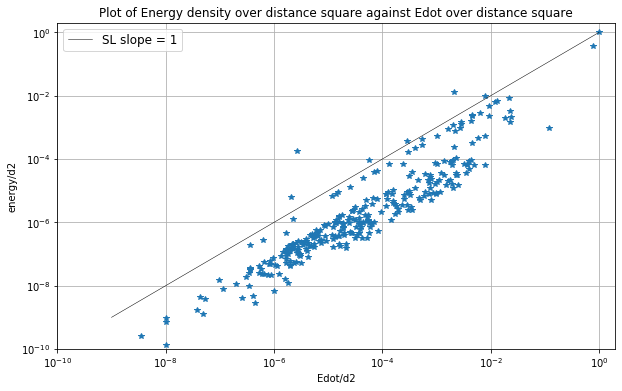

In [4]:
############################################# PLOT ####################################
# We plot the data without distinguishing the different pulsars
# We define the axis
axisy = np.zeros(N)
axisx = np.zeros(N)
for i in numbers:
    axisy[i] = epsilon2[i]
    axisx[i] = Edot[i]/(distance[i]**2)

# We normalised them
normx = max(axisx)
normy = max(axisy)

for n in numbers:
    axisy[n] = axisy[n]/normy
    axisx[n] = axisx[n]/normx

x2 = np.linspace(10**(-9),1,50)

plt.rcParams['figure.figsize'] = (10, 6)
plt.loglog(axisx, axisy,'*')
plt.loglog(x2, x2,'k',linewidth = 0.5, label='SL slope = 1')
plt.title('Plot of Energy density over distance square against Edot over distance square')
plt.ylabel('energy/d2')
plt.xlabel('Edot/d2')
plt.xlim(10**(-10),2)
plt.ylim(10**(-10),2)

plt.legend(loc='best', fontsize=12)
plt.grid(True)

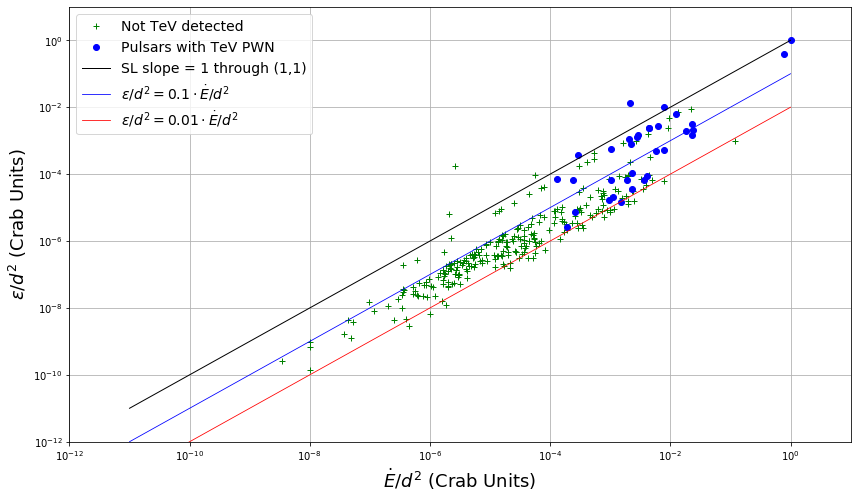

In [5]:
############################################ ADDING STRAIGHT LINES ######################################

# We apply the next filter
mask1 = discoveredbool == 1
mask0 = discoveredbool == 0
mask3 = axisy < 10**(-6)
mask3good = mask3 * np.logical_not(mask1)
mask4 = np.logical_not(mask3) * np.logical_not(mask1)
notmask1 = np.logical_not(mask1)

masks1 = mask1 & mask3

x2 = np.linspace(10**(-11),1,100)

plt.rcParams['figure.figsize'] = (14, 8)

plt.loglog(axisx[notmask1], axisy[notmask1],'g+',label='Not TeV detected')
plt.loglog(axisx[mask1], axisy[mask1],'bo', label='Pulsars with TeV PWN')
plt.loglog(x2, x2,'k',linewidth = 1.0, label='SL slope = 1 through (1,1)')
plt.plot(x2, x2*10**(-1),'b',linewidth = 0.8, label=r'$\varepsilon/d^2 = 0.1 \cdot \dot{E}/d^2$')
plt.plot(x2, x2*10**(-2),'r',linewidth = 0.8, label=r'$\varepsilon/d^2 = 0.01 \cdot \dot{E}/d^2$')

plt.ylabel(r'$\varepsilon/d^2$ (Crab Units)',fontsize=18)
plt.xlabel(r'$\dot{E}/d^2$ (Crab Units)',fontsize=18)
plt.xlim(10**(-12),10)
plt.ylim(10**(-12),10)
plt.grid(True)
plt.legend(loc='best', fontsize=14)



In [6]:
###################################### GOOD ENERGY DENSITY PLOT ################################
names7kyr=['J1808-2024','J1846-0258','J1714-3810','J0534+2200','J1550-5418',
 'J1513-5908','J1119-6127','J0540-6919','J1050-5953','J1124-5916',
 'J1930+1852','J1640-4631','J1745-2900','J1841-0456','J1023-5746',
 'J1833-1034','J0537-6910','J1747-2809','J0205+6449','J1813-1749',
 'J0100-7211']

mask_names7kyr=np.zeros(N, dtype=bool)
for n in range(0,N):
    if names[n] in names7kyr:
        mask_names7kyr[n]=True
mask_twice=tau<7000

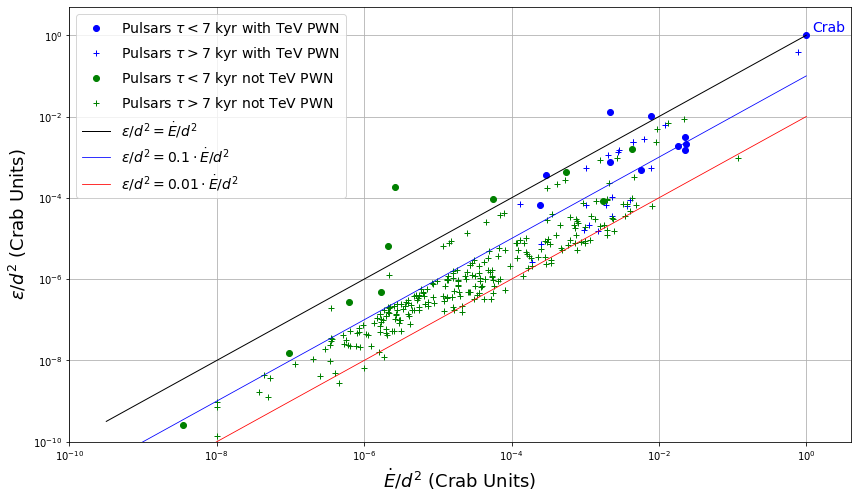

In [7]:
############################################ ADDING STRAIGHT LINES ######################################

# We apply the next filter
maskdiscovered = discoveredbool == 1 #mask1
masknotdiscovered = discoveredbool == 0 #mask0

disc_less7kyr=maskdiscovered*mask_names7kyr # DISCOVERED LESS 7 KYR
disc_gtr7kyr=maskdiscovered*np.logical_not(mask_names7kyr) # DISCOVERED GRT 7 KYR
notdisc_less7kyr=masknotdiscovered*mask_names7kyr # NOT DISCOVERED LESS 7 KYR
notdisc_gtr7kyr=masknotdiscovered*np.logical_not(mask_names7kyr) # NOT DISCOVERED GRT 7 KYR

x2 = np.linspace(10**(-9.5),1,100)

plt.rcParams['figure.figsize'] = (14, 8)
plt.loglog(axisx[disc_less7kyr], axisy[disc_less7kyr],'bo', label=r'Pulsars $\tau < 7$ kyr with TeV PWN')
plt.loglog(axisx[disc_gtr7kyr], axisy[disc_gtr7kyr],'b+',label=r'Pulsars $\tau > 7$ kyr with TeV PWN')
plt.loglog(axisx[notdisc_less7kyr], axisy[notdisc_less7kyr],'go', label=r'Pulsars $\tau < 7$ kyr not TeV PWN')
plt.loglog(axisx[notdisc_gtr7kyr], axisy[notdisc_gtr7kyr],'g+',label=r'Pulsars $\tau > 7$ kyr not TeV PWN')
plt.loglog(x2, x2,'k',linewidth = 1.0, label=r'$\varepsilon/d^2 = \dot{E}/d^2$')
#plt.plot(x2, x2*10**(-4.5),'k',linewidth = 0.8, label=r'SL in log scale w/ slope = 1 & b = $10^{-4.5}$')
plt.plot(x2, x2*10**(-1),'b',linewidth = 0.8, label=r'$\varepsilon/d^2 = 0.1 \cdot \dot{E}/d^2$')
plt.plot(x2, x2*10**(-2),'r',linewidth = 0.8, label=r'$\varepsilon/d^2 = 0.01 \cdot \dot{E}/d^2$')
plt.text(1.2,1.2,'Crab',color='blue',fontsize=14)
#plt.plot(10**x3, 10**x3 - 10**(-4),'g')
#plt.plot(np.log10(x2), np.log10(x2) - 0.5,'b')

#plt.title('Plot of Energy density over distance square against Edot over distance square')
plt.ylabel(r'$\varepsilon/d^2$ (Crab Units)',fontsize=18)
plt.xlabel(r'$\dot{E}/d^2$ (Crab Units)',fontsize=18)
plt.xlim(10**(-10),4)
plt.ylim(10**(-10),5)
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.savefig('energydensity500kyr.png')


In [8]:
######################################################################################################################
#################################### P0 DISTRIBUTION #############################################################
# We create the mask of pulsars with size
mask5 = sizebool == 1
M = len(size[mask5]) 

# Functions
def fEdot0(ttau, rad):
    return ( rad*(10**38)**0.2*(10**3)**1.2/(1.1*ttau**1.2) )**5 # rad in parsecs

def ftau0(ttau, Edott0, Edott):
    return ttau * (Edott/Edott0)**(-0.5)

def fP0(tau,tau0,P):
    return (tau0/tau)**0.5 * P

Edot0p = np.zeros(M)
tau0p = np.zeros(M)
P0 = np.zeros(M)
#size[mask1] = 2*size[mask1]
for i in range(0, len(size[mask5])):
    Edot0p[i] = fEdot0(tau[i], size[mask5][i])
    tau0p[i] = ftau0(tau[i], Edot0p[i], Edot[i])
    P0[i] = fP0(tau[i], tau0p[i], P[i])
#print(Edot0)
#print(tau0)

#size = [3, 3, 16.8, 21.1, 9 , 35, 7, 5, 6 ]
print('\n \n The values of size are: \n', size[mask5],'\n \n ')
print('The values of P0 are: \n', P0)
print(' Number of data: ', len(P0))



 
 The values of size are: 
 [15.2 31.1 21.1 14.2 11.9 16.8 31.7  8.  35.  42.3 37.7  4.4 19.2 10.9
  7.  28.7 52.8 37.7  6.  48.3  4.  25.7 61.9  3.  11.9 61.9 41.1 16.2
 16.2  9.   3.   5.  10. ] 
 
 
The values of P0 are: 
 [1.98750015e+02 1.11905945e-01 1.10918914e-02 6.95581242e-03
 4.15418398e-01 2.98883021e-02 2.98840278e+00 1.09976689e-02
 1.51362787e+00 1.02174348e-01 2.16918355e-03 2.58273959e-03
 2.90861316e-02 4.92749391e-02 1.41577074e-01 3.12779016e-02
 8.48152137e-02 1.10738060e+00 1.16071898e-02 8.43843518e-02
 1.38690914e-03 3.75261736e-02 1.91258532e-01 1.64915030e-02
 2.47625126e-01 3.20857892e+00 6.65740333e-02 1.47945888e+01
 5.85667719e-02 3.78939531e-03 7.24570529e-04 2.09435189e-03
 1.19067376e-02]
 Number of data:  33


The mean is: 
 6.791689255551824

 And the sd is:  34.032667905026294
The number of data is:  33
[5.27927565e+38 1.07133168e+30 1.72310014e+28 8.11005508e+28
 6.83081549e+41 5.78763944e+39 2.04623129e+34 1.79397530e+26
 2.13733469e+40 9.83381845e+32 3.53113908e+30 2.47298961e+27
 3.86118306e+37 2.30723270e+29 5.89075097e+35 6.35609057e+29
 3.28130138e+30 1.50671497e+39 6.93272869e+25 1.72276182e+30
 5.81057245e+27 1.13486533e+34 6.39433062e+32 8.98958714e+29
 3.94516201e+29 8.91777209e+39 3.12993702e+37 3.97792317e+42
 1.25574270e+33 5.05281110e+26 1.00749972e+27 3.01622917e+30
 5.07867075e+33]
[4.15116358e+06 6.74841922e+03 5.95553834e+02 3.32144427e+02
 1.12695641e+05 1.69433629e+04 1.83285471e+05 1.19979640e+02
 6.06977786e+05 1.89497340e+04 6.84788485e+02 3.15409568e+01
 1.10504211e+04 1.02483004e+03 6.47520550e+03 2.46130835e+03
 1.13998220e+04 3.96951003e+05 8.13614240e+01 9.54641819e+03
 2.07364831e+01 7.34332521e+03 4.21813046e+04 1.38493620e+02
 3.46566969e+03 1.71622048e+06 4

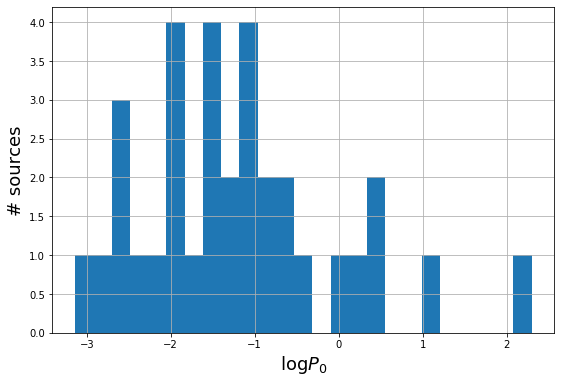

In [9]:

#################################### P0 HISTOGRAM
# PLOT ENERGY DENSITY HISTOGRAM
plt.rcParams['figure.figsize'] = (9, 6)

#plt.title(r'Histogram of $P_0$ values for the $< 500$ kyr sample', fontsize = 16)
#plt.xscale('log')
#plt.hist(epsilon,bins=30)
plt.ylabel(r'# sources', fontsize = 18)
plt.xlabel(r'$\log{P_0}$', fontsize = 18)
#plt.semilogx()
plt.hist(np.log10(P0),bins=25)
plt.grid(True)
#plt.show()
#plt.clf()

#plt.savefig("histogramP0for500kyrGOOD.png")


print('The mean is: \n', np.mean(P0))
print('\n And the sd is: ', np.std(P0))

#print('The names are: ', names[mask1])
print('The number of data is: ', len(names[mask1]))
print(Edot0p)
print(tau0p)
print(len(P0))



In [10]:
for i in range(len(P0)):
    if np.log10(P0[i]) > 0:
        print(names[i], np.log10(P0[i]), P0[i])

J0100-7211 2.2983071707777887 198.75001530768893
J0534-6703 0.4754391312153479 2.988402776353364
J1357-6429 0.18001911557247727 1.513627869652216
J1341-6220 0.044296911305659895 1.1073806009929246
J1413-6141 0.506312725415502 3.2085789163589395
J1119-6127 1.1701028979325838 14.794588766802931


[15.2 31.1 21.1 14.2 11.9 16.8 31.7  8.  35.  42.3 37.7  4.4 19.2 10.9
  7.  28.7 52.8 37.7  6.  48.3  4.  25.7 61.9  3.  11.9 61.9 41.1 16.2
 16.2  9.   3.   5.  10. ]
[ 3100. 10720.  8400.  1890.  5630.  4400.  3160.  1420.  2080.  4740.
 12750.   280.  2600.  3490.  8140.  4400.  5000.  3270.  4700.  3610.
  4100.  4500.  6600.  5800.  4570.  6320.  2370.   290.   190.  7000.
  2000.  3200.  1400.]
J1357-6429 0.2809318933708217 3100.0
J1301-6305 0.16622143132172298 10720.0
J1119-6127 0.14392123869817303 8400.0
J1418-6058 0.43046812737882073 1890.0
J1420-6048 0.1211045756368962 5630.0
J1513-5908 0.21876464051186353 4400.0
J1016-5857 0.5747516733911114 3160.0
J1028-5819 0.32278970895975034 1420.0
J1023-5746 0.9640206953786357 2080.0
J1617-5055 0.5112968647126981 4740.0
J1640-4631 0.16941526216008404 12750.0
J0835-4510 0.9002881490194834 280.0
J1709-4429 0.42309960407836467 2600.0
J1718-3825 0.17894612208542435 3490.0
J1747-2809 0.049271542718142845 8140.000000000001
J1803-2137 0.37371

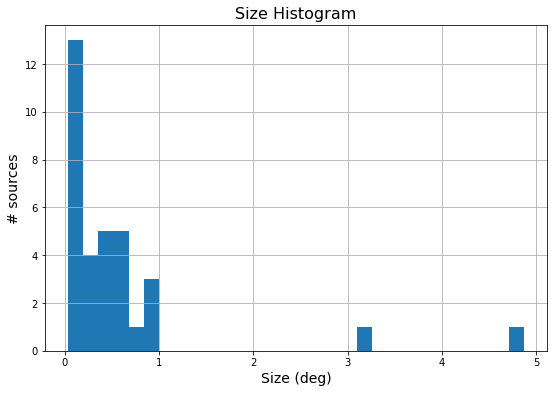

In [11]:

# PD: FOR J1640-4631 THERE ARE TWO CANDIDATES WITH SIZE 14.0 AND 37.7, I CHOSE 14.0
print(size[mask5]) # should be 17

print(distance[mask5])

I = len(size[mask5])
angles = np.zeros(I)
anglestwo = np.zeros(I)
for i in range(0,I):
    angles[i] = np.arctan(size[mask5][i] / (distance[mask5][i]) )
    angles[i] = np.rad2deg(angles[i])
    print(names[mask5][i], angles[i], distance[mask5][i])


# PLOT ENERGY DENSITY HISTOGRAM
plt.rcParams['figure.figsize'] = (9, 6)
plt.title('Size Histogram', fontsize = 16)
#plt.xscale('log')
#plt.hist(epsilon,bins=30)
plt.xlabel(r'Size (deg)', fontsize = 14)
plt.ylabel(r'# sources', fontsize = 14)

#plt.semilogx()
plt.hist(angles,bins=30)
plt.grid(True)
#plt.savefig("histogram_angles.png")

#plt.show()
#plt.clf()
print(angles)
print(names[mask5])
print(np.mean(angles))

anothermask = angles < 1
print(np.mean(angles[anothermask]))

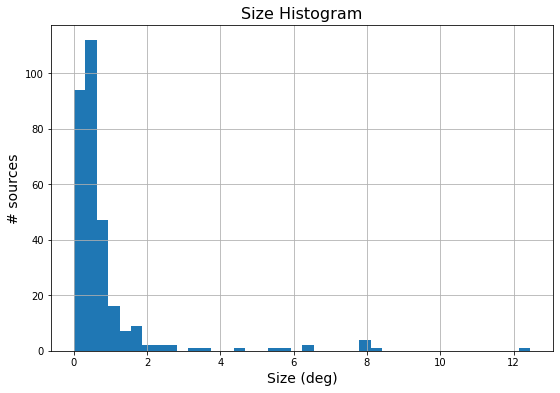

In [12]:
sizedeg = np.arcsin(radius/(distance))*180/np.pi
# PLOT ENERGY DENSITY HISTOGRAM
plt.rcParams['figure.figsize'] = (9, 6)
plt.title('Size Histogram', fontsize = 16)

#plt.hist(epsilon,bins=30)
plt.xlabel(r'Size (deg)', fontsize = 14)
plt.ylabel(r'# sources', fontsize = 14)


plt.hist(sizedeg,bins=40)
plt.grid(True)
#plt.savefig("histogram_ALLsizes.png")


Radius: 
 [ 5.82226252  6.58978671  2.60802311  6.53709195  7.28295416  2.55277046
 18.52252775 41.29975197  7.67700583  6.35663957  5.48130978  6.82964484
  7.71707152 41.51862242  9.6375166   7.3771447  27.47422412 41.38991757
 10.53837401 20.44182981  8.57184703 41.33601688 25.54986552  1.18548306
 41.1164003  16.30540708  7.94266907 40.9962141  41.00233797  4.81017578
  2.593775    9.39256778  6.9926734 ]
The difference (in absolute value) between both radius is: 
 [1.61066896 3.71942437 7.09041911 1.17221971 0.63395234 5.58108523
 0.71142948 0.80629424 3.55906909 5.65445941 5.87791815 0.35574981
 1.48799042 0.7374672  0.27367181 2.89039407 0.92180131 0.08915016
 0.43065221 1.36280218 0.53335611 0.37826617 1.42271334 1.53061398
 0.71057778 2.7962867  4.17458296 0.60484156 0.60490058 0.87103349
 0.15661536 0.46766421 0.43006822]

  [1.61066896 3.71942437 7.09041911 1.17221971 0.63395234 5.58108523
 0.71142948 0.80629424 3.55906909 5.65445941 5.87791815 0.35574981
 1.48799042 0.73746

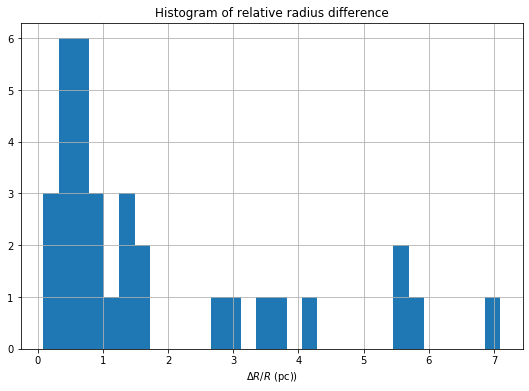

In [13]:
###################################### COMPARISON OF RADIUS AND SIZE ################################################

print('Radius: \n', radius[mask5])

M = len(names[mask5])
abs = np.zeros(M)
# We obtain the relative difference
for i in range(0,M):
    abs[i] = np.abs(size[mask5][i] - radius[mask5][i] )
    abs[i] = abs[i]/radius[mask5][i]



print('The difference (in absolute value) between both radius is: \n', abs)
# FIND METHOD IN PYTHON 
plt.title('Histogram of relative radius difference')
#plt.xscale('log')
#plt.hist(epsilon,bins=30)
plt.xlabel(r'$\Delta{R}/R$ (pc))')
#plt.semilogx()
plt.hist(abs,bins=30)
plt.grid(True)

print('\n ', abs)

In [14]:
sizedeg = np.arcsin(radius/(distance))*180/np.pi
#print(sizedeg)

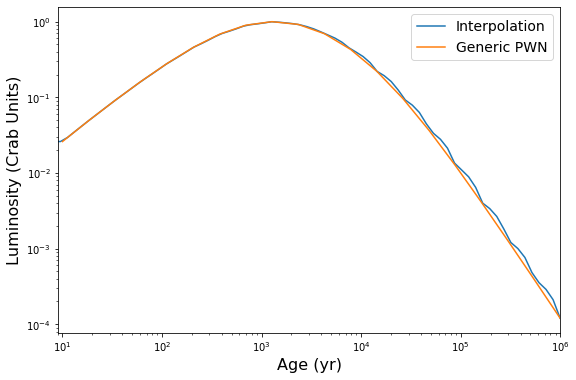

In [15]:

age_lu, lum_lu = np.loadtxt("psrlumevol_generic_1_tst.dat").T
plt.rcParams['figure.figsize'] = (9, 6)

interpolator = interp1d(age_lu, lum_lu, bounds_error=False, fill_value=(lum_lu[0], lum_lu[-1]))
x = np.linspace(np.log10(0.1), np.log10(10**6), 100)
psrlum = interpolator(10**x) 
plt.loglog(10**x, psrlum,label = 'Interpolation')
plt.loglog(age_lu, lum_lu,label = 'Generic PWN')
plt.xlim(9, 10**6)
#plt.title("Luminosity interpolation", fontsize=16)
plt.ylabel(r"Luminosity (Crab Units)", fontsize=16)
plt.xlabel("Age (yr)", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.savefig("luminosityinterpol.png")

In [16]:
# We obtain the luminosity for the first pulsar and print it
lum1 = interpolator(tau[0]) * Edot[0]
#print(lum1, names)

# We look for the idex of the Crab so we can normalize to it later on
for n in range(0,len(names)):
    if names[n] == 'J0534+2200':
        cr = n
# Function to return Edot at t = time of crab
def fEdottt(Edot0,tt,ttau0):
    return Edot0*(1 + tt/ttau0)**(-2)

# We obtain Edot of Crab
Edotcr = fEdottt(Edot0[cr], tau[cr], tau0[cr])

# We print the name of the index = cr, to make sure it is the Crab: J0534+2200
print(names[cr])
# We obtain the luminosities for all pulsars and divide them by the Crab luminosity
luminosities1 = interpolator(tau)*Edot[cr]
luminosities20=luminosities1
# We obtain the flux dividing by 4*pi*d^2
flux = luminosities1/(4*np.pi*distance*distance)

# We look for the idex of the Crab inside the mask so we can normalize to it later on for the plot
for n in range(0,len(names[mask1])):
    if names[mask1][n] == 'J0534+2200':
        cr2 = n
        print('Index of Crab in the mask: ',cr2)
        
print(len(flux))
# We divide the flux by the Flux of the Crab and print it
fluxrel = flux/flux[mask1][cr2]

print('Length of flux of TeV detected', len(flux))
print('Length of relative flux of TeV detected', len(fluxrel[mask1]))
print('Length of luminosities of TeV detected ', len(luminosities1[mask1]))
print(flux[cr])

J0534+2200
Index of Crab in the mask:  30
304
Length of flux of TeV detected 304
Length of relative flux of TeV detected 33
Length of luminosities of TeV detected  33
8.929950479337253e+30


In [17]:
print(min(flux),max(flux),np.mean(flux),np.std(flux))

8.259174736085166e+24 1.4606862740845629e+32 9.226317946617149e+29 8.643715900236786e+30


(array([25., 39., 19., 11., 20., 20., 12., 28., 14.,  7., 20.,  5., 10.,
        11., 10., 15.,  8., 10.,  8., 12.]),
 array([35.4088593 , 35.57102228, 35.73318526, 35.89534824, 36.05751122,
        36.2196742 , 36.38183718, 36.54400016, 36.70616314, 36.86832612,
        37.0304891 , 37.19265208, 37.35481506, 37.51697804, 37.67914102,
        37.841304  , 38.00346698, 38.16562996, 38.32779294, 38.48995593,
        38.65211891]),
 <a list of 20 Patch objects>)

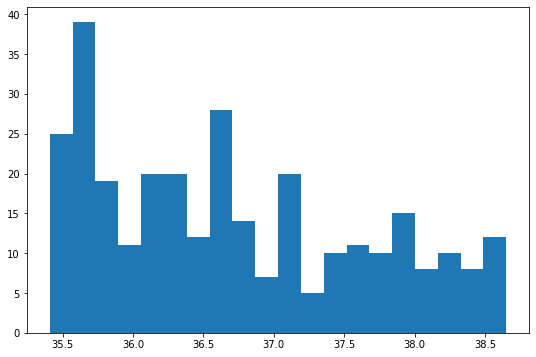

In [18]:
plt.hist(np.log10(luminosities20), bins=20)

(array([ 4.,  1.,  9., 49., 54., 58., 39., 50., 30.,  7.]),
 array([-6.0339124 , -5.43052116, -4.82712992, -4.22373868, -3.62034744,
        -3.0169562 , -2.41356496, -1.81017372, -1.20678248, -0.60339124,
         0.        ]),
 <a list of 10 Patch objects>)

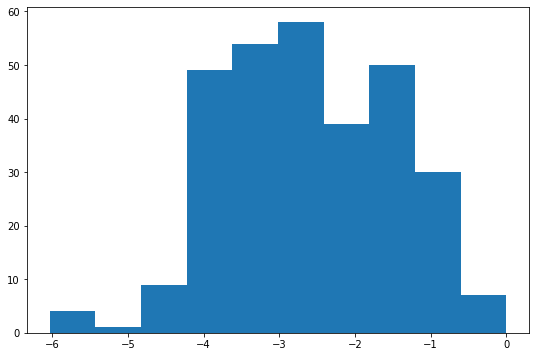

In [19]:
# PWN with flux less than Crab
fluxleq1 = fluxrel <= 1
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(np.log10(fluxrel[fluxleq1]),bins=10)

In [20]:
fluxgeq1 = fluxrel >= 1

In [21]:
# PULSARS GREATER FLUX THAN CRAB
print('Pulsars with flux greater than the crab')
print('Name           Fluxrel              Log(Edot)    dist     tau     size')
for i in range(len(names[fluxgeq1])):
    print(names[fluxgeq1][i], fluxrel[fluxgeq1][i], np.log10(Edot[fluxgeq1][i]), distance[fluxgeq1][i], tau[fluxgeq1][i],sizedeg[fluxgeq1][i])            

Pulsars with flux greater than the crab
Name           Fluxrel              Log(Edot)    dist     tau     size
J0940-5428 1.4741695798492696 36.27875360095283 380.0 42200.0 6.239922116144322
J0835-4510 16.357159846120105 36.838849090737256 280.0 11300.0 1.3976737038752622
J1740-3015 3.9187728039141403 34.91381385238372 400.0 20600.0 2.2791403814947553
J0534+2200 1.0 38.653212513775344 2000.0 1260.0 0.07430620122427337


In [22]:
names[fluxgeq1]

array(['J0940-5428', 'J0835-4510', 'J1740-3015', 'J0534+2200'],
      dtype='<U16')

In [23]:
#####################################
# GEMINGA
fluxgeq1 = fluxrel >= 1
print(fluxrel[fluxgeq1])
print(names[fluxgeq1])

for i in range(len(names)):
    if names[i] == 'J0633+1746':
        geminga = i

print(names[geminga], fluxrel[geminga], luminosities20[geminga], distance[geminga])
print(flux[cr2], flux[geminga])

[ 1.47416958 16.35715985  3.9187728   1.        ]
['J0940-5428' 'J0835-4510' 'J1740-3015' 'J0534+2200']
J0633+1746 0.12498362726033099 5.063131895917252e+35 190.0
3.4138220596928563e+28 1.1160976021627013e+30


In [24]:

#print(' The size: \n', size[mask1])
#print(' The radius: \n', radius[mask1])
#print('\n And the distance is: \n',distance[mask1])

sizedeg = np.arcsin(radius/(distance))*180/np.pi
print(len(radius), len(sizedeg))
print('Test:', radius[mask1][28], distance[mask1][28], names[mask1][28])
print('We obtain a sizedeg NaN, corresponding to Gaminga:', names[mask1][28], sizedeg[mask1][28])
print(len(size), len(radius), len(distance), len(lii))
#print('Size:',size)
#print('Radius:', radius)
#print('Distance:', distance)
#print('Lii:', lii)
print('Len Lii', len(lii))
#print('Flux rel', fluxrel)
print('Len Flux', len(fluxrel))
print('Luminosities20', len(luminosities20))
print(np.mean(sizedeg))

304 304
Test: 41.00233796585819 190.0 J0633+1746
We obtain a sizedeg NaN, corresponding to Gaminga: J0633+1746 12.462570143238509
304 304 304 304
Len Lii 304
Len Flux 304
Luminosities20 304
0.8052136947359011


In [25]:
print(np.arcsin(radius[geminga]/(distance[geminga]))*180/np.pi)
print(distance[geminga])
print(sizedeg[geminga])

12.462570143238509
190.0
12.462570143238509


In [26]:
mask7 = np.abs(bii) < 10
mask8 = mask5 & mask7
plt.rcParams['figure.figsize'] = (10, 6)
maskk1 = lii > 180
maskk2 = lii <= 180
maskf1 = maskk1 & mask7 # CHANGED MASKF1 TO mask7 TO TEST IT
maskf2 = maskk2 & mask7

In [27]:
newliitotal = np.zeros(len(lii[mask7]))
for n in range(0,len(lii[mask7])):
    if lii[mask7][n] > 180:
        newliitotal[n] = lii[mask7][n] - 180
    else:
        newliitotal[n] = lii[mask7][n] + 180

In [28]:
############################################# ALL MASKS ####################################################
# mask1 = discoveredbool == 1, the discovered
# mask0 = discoveredbool == 0, not discovered
# mask3 = axisy < 10**(-6)
# mask3good = mask3 * np.logical_not(mask1)
# mask4 = np.logical_not(mask3) * np.logical_not(mask1) 
# masks1 = mask1 & mask3
# mask5 = sizebool == 1
# mask7 = np.abs(bii) < 10
# mask8 = mask5 & mask7
# maskk1 = lii > 180
# maskk2 = lii <= 180
# maskf1 = maskk1 & mask7 # CHANGED MASKF1 TO mask7 TO TEST IT
# maskf2 = maskk2 & mask7
# mask10 = radius > 100
# mask11 = mask10 & mask8
maskj = mask1 * mask7 # mask1 is for detected, mask7 is for bii < 10
maskpl1 = maskf1 & mask1
maskpl2 = maskf2 & mask1
# Then they changed to:
# maskpl1 = maskf1 * maskj
# maskpl2 = maskf2 * maskj


#maskpl1 = maskf1 & mask1

maskpl2a = maskf2 * mask1
maskpl2b = maskf2 * maskj
print(len(names[maskpl2a]), len(names[maskpl2b]))
print(len(names))
print(len(names[maskf2]), len(names[maskf1]), 137+156)
print(len(names[maskpl1]), len(names[maskpl2]), len(names[mask7])  )

15 15
304
137 156 293
17 15 293


In [29]:
epsilon[cr]

5197.285427964134

In [30]:
############################ CHANGE ORDER OF PLOTTING FROM GREATER TO SMALLER ########################
#sizedeg2 = sizedeg
sizedeg3 = np.sort(sizedeg) # Ordered from minimum to maximum
sizedeg2 = sizedeg3[::-1] # Ordered from maximum to minimum

In [31]:
newlii = np.zeros(len(lii))
for n in range(0,len(lii)):
    if lii[n] > 180:
        newlii[n] = lii[n] - 180
    else:
        newlii[n] = lii[n] + 180

In [32]:
###################### NOW WE CHANGE THE ORDER OF THE REST OF MAGNITUDES ##################################3
newordernames =[]
neworderlii = np.zeros(len(names))
neworderbii = np.zeros(len(names))
neworderfluxrel = np.zeros(len(names))
for i in range(len(names)):
    for n in range(len(names)):
        if sizedeg2[i] == sizedeg[n]:
            newordernames = newordernames + [names[n]]
            neworderbii[i] = bii[n]
            neworderlii[i] = newlii[n]
            neworderfluxrel[i] = fluxrel[n]
#print(newordernames)
#print(names)


Max, min 6.923419620251403 6.201902194252988
Count1 8
Count2 23 Count2bis 0
Count3 2
Total number of pulsars detected: 33
Number of pulsars in the mask: 304
There should be one pulsar with b greater than 10, we will print the bii values: 



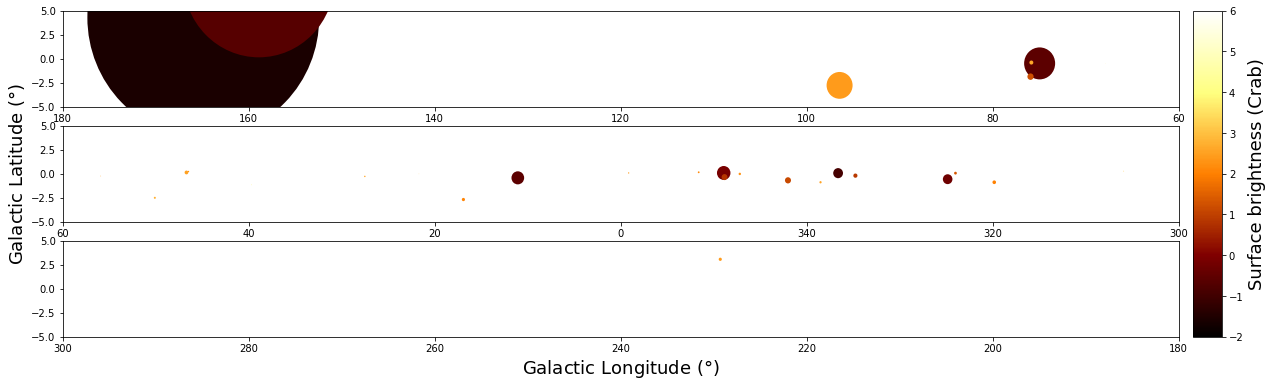

In [71]:
######################################### GALLACTIC PLANE FOR TeV DETECTED #############################################
# Masks for TeV detected: The first one is for lii > 180, |bii| < 10 and discovered
maskpl1 = maskf1 * mask1
maskpl2 = maskf2 * mask1


# Creates two subplots and unpacks the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (20,6))

import matplotlib as mpl
import gc 
from matplotlib.patches import Circle


#fig, ax = plt.subplots(figsize=(14,6))
#fig2, ax2 = plt.subplots(figsize=(14,6))

cbax = fig.add_axes([0.91, 0.125, 0.02, 0.755])

#give min and max of flux instead of -3.4 and -2
area = 4*np.pi * sizedeg2**2
fluxarea = fluxrel/area
#norm = mpl.colors.Normalize(vmin=-np.log10(fluxarea.min()*100), vmax=np.log10(fluxarea.max()*100))
norm = mpl.colors.Normalize(vmin=-2, vmax=6)

#norm = mpl.colors.Normalize(vmin=-fluxrel.min(), vmax=fluxrel.max())

cmap = plt.cm.afmhot

#Your choice, e.g. viridis or afmhot —> this example used “magma_r"

m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

#When you draw the circle, use the facecolor option

#i.e. convert from map to rgb

#Draw colour bar as before:

#cbar_axes = gc._figure.add_axes([0.8535, 0.1252, 0.031, 0.756])
cbar = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=norm, orientation='vertical')
cbar.set_label('Surface brightness (Crab)',fontsize=18)

count1 = 0
count2 = 0
count2bis = 0
count3 = 0
print('Max, min', -np.log10(fluxarea.min()*100), np.log10(fluxarea.max()*100) )

# These are the masks for the TeV detected, but since we are looking at the whole map, we only use maskf1 and 2
maskpl1 = maskf1 & mask1
maskpl2 = maskf2 & mask1

#sizedeg2 = sizedeg
sizedeg3mask = np.sort(sizedeg[mask1]) # Ordered from minimum to maximum
sizedeg2mask = sizedeg3mask[::-1]

###################### NOW WE CHANGE THE ORDER OF THE REST OF MAGNITUDES ##################################3
newordernames2 =[]
neworderlii2 = np.zeros(len(names[mask1]))
neworderbii2 = np.zeros(len(names[mask1]))
neworderfluxrel2 = np.zeros(len(names[mask1]))
for i in range(len(names[mask1])):
    for n in range(len(names[mask1])):
        if sizedeg2mask[i] == sizedeg[mask1][n]:
            newordernames2 = newordernames + [names[mask1][n]]
            neworderbii2[i] = bii[mask1][n]
            neworderlii2[i] = newlii[mask1][n]
            neworderfluxrel2[i] = fluxrel[mask1][n]
            
for n in range(len(names[mask1])):
    area = np.pi* sizedeg2mask**2
    p1 = Circle((neworderlii2[n], neworderbii2[n]), sizedeg2mask[n], fc=m.to_rgba(np.log10(neworderfluxrel2[n]*100/area[n])))
    #print('Creating p1', lii[n]-180, bii[n],n)
    if neworderlii2[n] < 120:   
        ax1.add_artist(p1)
        count1 = count1 + 1
        #print('First Plot:', lii[n] -180, bii[n], sizedeg[n])
        #print('Ho')
    elif 120 < neworderlii2[n] < 240:
        ax2.add_artist(p1)
        count2 = count2 + 1
        #print('Hi')
    else:
        ax3.add_artist(p1)
        count3 = count3 + 1
        #print('Ups')
        
        
        
        
        


#p2 = Circle((lii[31], bii[31]), sizedeg[31], fc=m.to_rgba(fluxrel[31]))
#p3 = Circle((lii[6], bii[6]), sizedeg[6], fc=m.to_rgba(fluxrel[6]))
#ax.add_artist(p2)
#ax.add_artist(p3)
#plt.plot(lii[maskf1]-180, bii[maskf1],'*')
#plt.plot(lii[maskf2]+180, bii[maskf2],'o')




ax1.set_xlim([0,120])
ax1.set_ylim([-5,5])
locs1 = ax1.get_xticks() 
labels1 = ['180', '160', '140', '120', '100', '80', '60']
#ax1.set_xticks(locs1,labels1)
ax1.set_xticklabels(labels1)



ax2.set_xlim([120,240])
ax2.set_ylim([-5,5])
locs2 = ax2.get_xticks() 
labels2 = ['60', '40', '20', '0', '340', '320', '300']
#ax2.set_xticks(locs2,labels2)
ax2.set_xticklabels(labels2)


ax3.set_xlim([240,360])
ax3.set_ylim([-5,5])
locs3 = ax3.get_xticks() 
labels3 = ['300', '280', '260', '240', '220', '200', '180']
#ax3.set_xticks(locs3,labels3)
ax3.set_xticklabels(labels3)

ax3.set_xlabel(r'Galactic Longitude ($\degree$)',fontsize = 18)
#ax1.set_ylabel('Galactic Latitude (deg)',fontsize = 14)
ax2.set_ylabel(r'Galactic Latitude ($\degree$)',fontsize = 18)
#ax3.set_ylabel('Galactic Latitude (deg)',fontsize = 14)


print('Count1', count1)
print('Count2', count2, 'Count2bis', count2bis)
print('Count3', count3)
print('Total number of pulsars detected:', count1 + count2 + count2bis + count3)
print('Number of pulsars in the mask:', len(names))
print('There should be one pulsar with b greater than 10, we will print the bii values: \n')
#print(lii[mask1])
#print(names[mask1])
#print(fluxrel[mask1])

#print('In the first plot, from 0 to 120 there are six pulsars, but only two of them have sizes big enough to be appreciated')
#print('In the third plot, from 0 to 120 there are six pulsars, but only four of them have sizes big enough to be appreciated')
plt.savefig("gallacticplaneonlyTeVDetected.png")
# array([129.92, 124.1 , 112.15, 133.32, 133.54, 140.32, 104.08, 105.06,
       #104.17, 152.5 , 158.32,  83.55, 163.1 , 168.95, 180.87, 188.4 ,
       #191.18, 191.09, 192.82, 198.  , 201.5 , 203.39, 205.25, 209.71,
       #215.17, 216.01, 220.18,  21.11,  15.13, 234.1 ,   4.56, 310.72,
       #299.66])

Max, min 6.923419620251403 6.201902194252988
Count1 62
Count2 213 Count2bis 0
Count3 29
Total number of pulsars detected: 304
Number of pulsars in the mask: 304
There should be one pulsar with b greater than 10, we will print the bii values: 



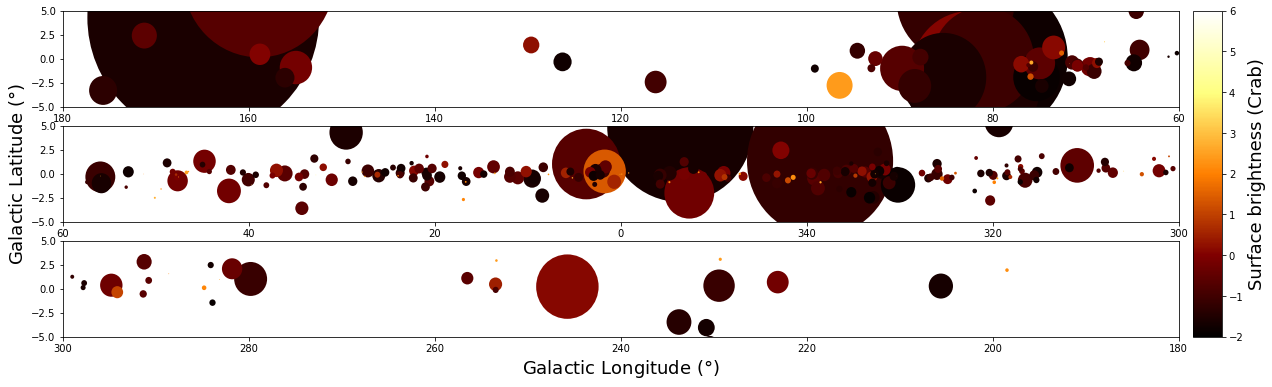

In [70]:
########################### GALLACTIC PLANE FOR ALL PWNe #############################################
# Masks for TeV detected: The first one is for lii > 180, |bii| < 10 and discovered
maskpl1 = maskf1 * mask1
maskpl2 = maskf2 * mask1


############################ CHANGE ORDER OF PLOTTING FROM GREATER TO SMALLER ########################
#sizedeg2 = sizedeg
sizedeg3 = np.sort(sizedeg) # Ordered from minimum to maximum
sizedeg2 = sizedeg3[::-1] # Ordered from maximum to minimum

###################### NOW WE CHANGE THE ORDER OF THE REST OF MAGNITUDES ##################################3
newordernames =[]
neworderlii = np.zeros(len(names))
neworderbii = np.zeros(len(names))
neworderfluxrel = np.zeros(len(names))
for i in range(len(names)):
    for n in range(len(names)):
        if sizedeg2[i] == sizedeg[n]:
            newordernames = newordernames + [names[n]]
            neworderbii[i] = bii[n]
            neworderlii[i] = newlii[n]
            neworderfluxrel[i] = fluxrel[n]

# Creates two subplots and unpacks the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (20,6))

import matplotlib as mpl
import gc 

#fig, ax = plt.subplots(figsize=(14,6))
#fig2, ax2 = plt.subplots(figsize=(14,6))

cbax = fig.add_axes([0.91, 0.125, 0.02, 0.755])

#give min and max of flux instead of -3.4 and -2
area = 4*np.pi * sizedeg2**2
fluxarea = fluxrel/area
#norm = mpl.colors.Normalize(vmin=-np.log10(fluxarea.min()*100), vmax=np.log10(fluxarea.max()*100))
norm = mpl.colors.Normalize(vmin=-2, vmax=6)

#norm = mpl.colors.Normalize(vmin=-fluxrel.min(), vmax=fluxrel.max())

cmap = plt.cm.afmhot

#Your choice, e.g. viridis or afmhot —> this example used “magma_r"

m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

#When you draw the circle, use the facecolor option

#i.e. convert from map to rgb

#Draw colour bar as before:

#cbar_axes = gc._figure.add_axes([0.8535, 0.1252, 0.031, 0.756])
cbar = mpl.colorbar.ColorbarBase(cbax, cmap=cmap, norm=norm, orientation='vertical')
cbar.set_label('Surface brightness (Crab)',fontsize=18)

count1 = 0
count2 = 0
count2bis = 0
count3 = 0
print('Max, min', -np.log10(fluxarea.min()*100), np.log10(fluxarea.max()*100) )

# These are the masks for the TeV detected, but since we are looking at the whole map, we only use maskf1 and 2
maskpl1 = maskf1 & mask1
maskpl2 = maskf2 & mask1

###################### NOW WE CHANGE THE ORDER OF THE REST OF MAGNITUDES ##################################3
newordernames =[]
neworderlii = np.zeros(len(names))
neworderbii = np.zeros(len(names))
neworderfluxrel = np.zeros(len(names))
for i in range(len(names)):
    for n in range(len(names)):
        if sizedeg2[i] == sizedeg[n]:
            newordernames = newordernames + [names[n]]
            neworderbii[i] = bii[n]
            neworderlii[i] = newlii[n]
            neworderfluxrel[i] = fluxrel[n]
#print(newordernames)
#print(names)

for n in range(0,len(lii)):
    area = np.pi * sizedeg2**2
    p1 = Circle((neworderlii[n], neworderbii[n]), sizedeg2[n], fc=m.to_rgba(np.log10(neworderfluxrel[n]*100/area[n])))
    #print('Creating p1', lii[n]-180, bii[n],n)
    if neworderlii[n] < 120:   
        ax1.add_artist(p1)
        count1 = count1 + 1
        #print('First Plot:', lii[n] -180, bii[n], sizedeg[n])
        #print('Ho')
    elif 120 < neworderlii[n] < 240:
        ax2.add_artist(p1)
        count2 = count2 + 1
        #print('Hi')
    else:
        ax3.add_artist(p1)
        count3 = count3 + 1
        #print('Ups')


#p2 = Circle((lii[31], bii[31]), sizedeg[31], fc=m.to_rgba(fluxrel[31]))
#p3 = Circle((lii[6], bii[6]), sizedeg[6], fc=m.to_rgba(fluxrel[6]))
#ax.add_artist(p2)
#ax.add_artist(p3)
#plt.plot(lii[maskf1]-180, bii[maskf1],'*')
#plt.plot(lii[maskf2]+180, bii[maskf2],'o')




ax1.set_xlim([0,120])
ax1.set_ylim([-5,5])
locs1 = ax1.get_xticks() 
labels1 = ['180', '160', '140', '120', '100', '80', '60']
#ax1.set_xticks(locs1,labels1)
ax1.set_xticklabels(labels1)



ax2.set_xlim([120,240])
ax2.set_ylim([-5,5])
locs2 = ax2.get_xticks() 
labels2 = ['60', '40', '20', '0', '340', '320', '300']
#ax2.set_xticks(locs2,labels2)
ax2.set_xticklabels(labels2)


ax3.set_xlim([240,360])
ax3.set_ylim([-5,5])
locs3 = ax3.get_xticks() 
labels3 = ['300', '280', '260', '240', '220', '200', '180']
#ax3.set_xticks(locs3,labels3)
ax3.set_xticklabels(labels3)

ax3.set_xlabel(r'Galactic Longitude ($\degree$)',fontsize = 18)
#ax1.set_ylabel('Galactic Latitude (deg)',fontsize = 14)
ax2.set_ylabel(r'Galactic Latitude ($\degree$)',fontsize = 18)
#ax3.set_ylabel('Galactic Latitude (deg)',fontsize = 14)


print('Count1', count1)
print('Count2', count2, 'Count2bis', count2bis)
print('Count3', count3)
print('Total number of pulsars detected:', count1 + count2 + count2bis + count3)
print('Number of pulsars in the mask:', len(names))
print('There should be one pulsar with b greater than 10, we will print the bii values: \n')
#print(lii[mask1])
#print(names[mask1])
#print(fluxrel[mask1])

#print('In the first plot, from 0 to 120 there are six pulsars, but only two of them have sizes big enough to be appreciated')
#print('In the third plot, from 0 to 120 there are six pulsars, but only four of them have sizes big enough to be appreciated')
plt.savefig("gallacticplanecompleteordered.png")

In [35]:
########################################## OVERLAPPED GALLACTIC PLANE ###########################################
############################################# LONG WAY OF DOING IT ##############################################
number = 0
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
namesof1 = []
namesof2 = []
# We need to divide the loop since the lii changes. 
for i in range(len(names)):
    for j in range(len(names)):
        if ((maskf1[i] == True) & (maskf1[j] == True)):
            difx = (lii[i]-180) - (lii[j]-180)
            dify = bii[i] - bii[j]
            distancia = np.sqrt(difx**2 + dify**2)
            if (distancia <= sizedeg[i]) & (distancia > 0):
                number = number + 1
                counter1 = counter1 + 1
                namesof1 += [names[i]]
                namesof2 += [names[j]]
        elif ((maskf2[i] == True) & (maskf2[j] == True)):
            difx = (lii[i]+180) - (lii[j]+180)
            dify = bii[i] - bii[j]
            distancia = np.sqrt(difx**2 + dify**2)
            if (distancia <= sizedeg[i]) & (distancia > 0):
                number = number + 1
                counter2 = counter2 + 1
        elif ((maskf1[i] == True) & (maskf2[j] == True)):
            difx = (lii[i]-180) - (lii[j]+180)
            dify = bii[i] - bii[j]
            distancia = np.sqrt(difx**2 + dify**2)
            if (distancia <= sizedeg[i]) & (distancia > 0):
                number = number + 1
                counter3 = counter3 + 1
        elif ((maskf2[i] == True) & (maskf1[j] == True)):
            difx = (lii[i]+180) - (lii[j]-180)
            dify = bii[i] - bii[j]
            distancia = np.sqrt(difx**2 + dify**2)
            if (distancia <= sizedeg[i]) & (distancia > 0):
                number = number + 1
                counter4 = counter4 + 1        
                
print(number)
print(counter1)
print(counter2)
print(counter3)
print(counter4)
#print(namesof1)

281
168
112
1
0


In [36]:
# NEW DEFINITION OF X AXIS +- 180
#maskj = mask1 * mask7 # mask1 is for detected, mask7 is for bii < 10
newlii = np.zeros(len(lii))
for n in range(0,len(lii)):
    if lii[n] > 180:
        newlii[n] = lii[n] - 180
    else:
        newlii[n] = lii[n] + 180
print(len(newlii))

304


In [37]:
newlii[mask1]

array([129.92, 124.1 , 112.15, 133.32, 133.54, 140.32, 104.08, 105.06,
       104.17, 152.5 , 158.32,  83.55, 163.1 , 168.95, 180.87, 188.4 ,
       191.18, 191.09, 192.82, 198.  , 201.5 , 203.39, 205.25, 209.71,
       215.17, 216.01, 220.18,  21.11,  15.13, 234.1 ,   4.56, 310.72,
       299.66])

In [38]:
########################################## OVERLAPPED GALLACTIC PLANE ###########################################


number = 0
newnamesof1 = []
newnamesof2 = []
# We need to divide the loop since the lii changes. 
maincounter = 0
alldistances = np.zeros(92416)
for i in range(len(names)):
    for j in range(len(names)):
        maincounter+= 1
        difx = newlii[i] - newlii[j]
        dify = bii[i] - bii[j]
        distancia = np.sqrt(difx**2 + dify**2)
        #alldistances[maincounter-1] = distancia
        if distancia <= sizedeg[i]:
            if distancia > 0:
                number = number + 1
                newnamesof1 += [names[i]]
                newnamesof2 += [names[j]]
                #print(names[i], names[j],number,'\n')
                
                
print(number)
print(maincounter)
print(len(names))
#print(namesof1)
maskpruebaa = sizedeg < 0
print(sizedeg[maskpruebaa])


281
92416
304
[]


In [39]:
########################################## OVERLAPPED GALLACTIC PLANE ###########################################


number = 0
newnamesof1 = []
newnamesof2 = []
# We need to divide the loop since the lii changes. 
maincounter = 0
alldistances = np.zeros(92416)
for i in range(len(names)):
    j = 0
    while j < i:
        maincounter+= 1
        difx = newlii[i] - newlii[j]
        dify = bii[i] - bii[j]
        distancia = np.sqrt(difx**2 + dify**2)
        #alldistances[maincounter-1] = distancia
        if distancia <= sizedeg[i]:
            if distancia > 0:
                number = number + 1
                newnamesof1 += [names[i]]
                newnamesof2 += [names[j]]
                #print(names[i], names[j],number,'\n')
        j+= 1    
                
print(number)
print(maincounter)
print(len(names))
#print(namesof1)
maskpruebaa = sizedeg < 0
print(sizedeg[maskpruebaa])
print(number,'number of overlapping sources in the galactic plane')

143
46056
304
[]
143 number of overlapping sources in the galactic plane


In [40]:
# We convert it into array
newnamesof1 = np.array(newnamesof1)
newnamesof2 = np.array(newnamesof2)

try1 = newnamesof1 == 'J1020-5921'
print(newnamesof2[try1])

try2 = newnamesof2 == 'J1020-6026'
try2 = newnamesof2 == 'J1016-5857'
try2 = newnamesof2 == 'J1028-5819'
try2 = newnamesof2 == 'J1022-5813'
#try2 = newnamesof2 == 'J1019-5749'
#try2 = newnamesof2 == 'J1023-5746'
#try2 = newnamesof2 == 'J1015-5719'

print(newnamesof1[try2])

['J1020-6026']
['J0942-5657' 'J0942-5552' 'J1001-5507' 'J0954-5430']


In [41]:
#newmask = namesof1 == 'J1301-6310'
newmask = np.array(namesof1) == 'J1301-6310'

print(np.array(namesof2)[newmask])
#print(newmask)

newmaskk = np.array(namesof2) == 'J1301-6310'

print(np.array(namesof1)[newmaskk])

['J1302-6350' 'J1248-6344' 'J1301-6305' 'J1305-6203']
['J1302-6350']


Text(0, 0.5, '# sources')

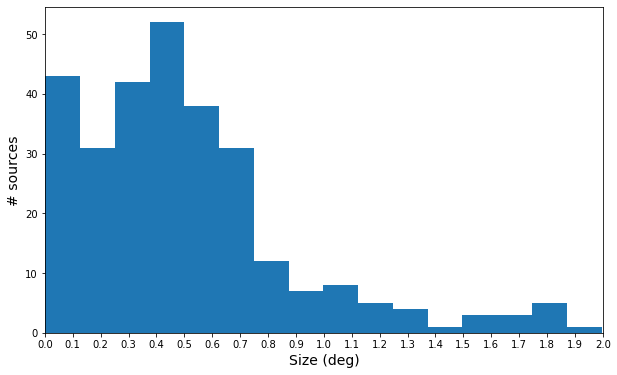

In [42]:
plt.hist(sizedeg, bins=100)
plt.xticks([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])
plt.xlim(0,2)
plt.xlabel("Size (deg)", fontsize=14)
plt.ylabel("# sources", fontsize=14)
#plt.title("Size (deg)", fontsize=14)
#plt.savefig("sizedegHistogramGOOD.png")

J0633+1746 12.462570143238509 263


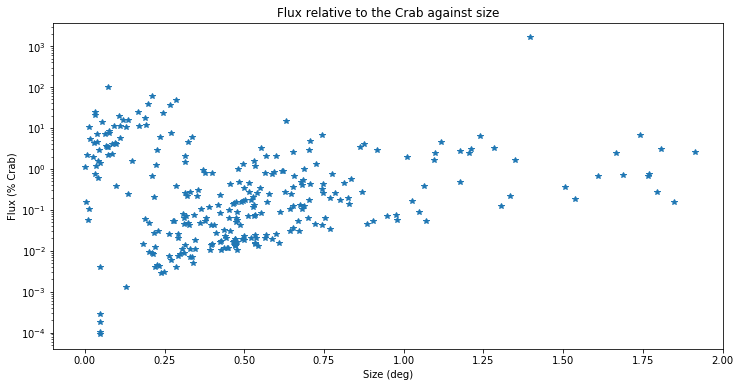

In [43]:
# We plot the Flux relative to the Crab against the size

plt.rcParams['figure.figsize'] = (12, 6)

plt.semilogy(sizedeg, fluxrel*100,'*')
plt.title('Flux relative to the Crab against size')
plt.xlabel('Size (deg)')
plt.ylabel('Flux (% Crab)')
plt.xlim(-0.1,2)
#print(sizedeg)
for m in range(0,len(sizedeg)):
    if sizedeg[m] > 12:
        i = m
print(names[i], sizedeg[i], i)    

304 20


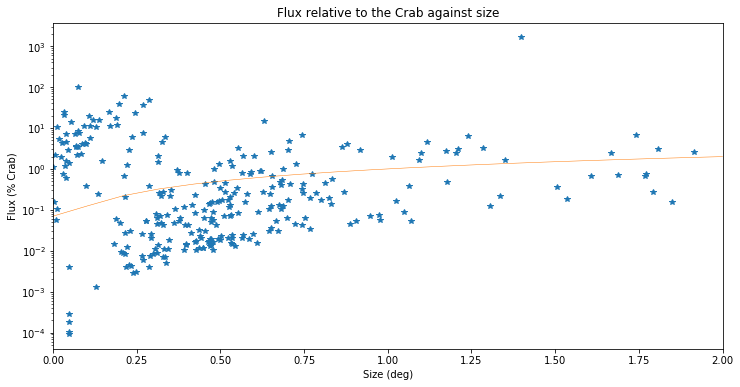

In [44]:
# We plot the Flux relative to the Crab against the size
sizex = np.linspace(0.,2.,20)
fluxfunc = np.sqrt(sizex**2 + 0.07**2)

plt.rcParams['figure.figsize'] = (12, 6)

plt.semilogy(sizedeg, fluxrel*100,'*')
plt.plot(sizex, fluxfunc, linewidth = 0.5)
plt.title('Flux relative to the Crab against size')
plt.xlabel('Size (deg)')
plt.ylabel('Flux (% Crab)')
plt.xlim(0,2)
#print(sizedeg)

print(len(sizedeg), len(fluxfunc))
#print(sizedeg, fluxfunc)

# Hess at 1 % Crab and CTA 0.1 % 
# Top 10 not yet Detected by HESS (top ten colser to the curve)


In [45]:
fluxgreaterCR = fluxrel >1
sizeless2 = sizedeg < 2
ambosmask = fluxgreaterCR * sizeless2
print(fluxrel[fluxgreaterCR]*100, names[fluxgreaterCR])
print(fluxrel[ambosmask]*100, names[ambosmask])
# GEMINGA IS J0633+1746

[ 147.41695798 1635.71598461  391.87728039] ['J0940-5428' 'J0835-4510' 'J1740-3015']
[1635.71598461] ['J0835-4510']


In [46]:
for i in range(0,len(fluxrel)):
    if names[i]=='J0633+1746':
        ggeminga=i

In [47]:
sizedeg[geminga]

12.462570143238509

In [48]:
sizegreater2 = sizedeg >2
print(sizedeg[sizegreater2])
print('\n', names[sizegreater2])
for i in range(len(sizegreater2[sizegreater2])):
    print(i, names[sizegreater2][i], sizedeg[sizegreater2][i], Edot[sizegreater2][i], distance[sizegreater2][i], tau[sizegreater2][i] )  
    print(i, names[sizegreater2][i], sizedeg[sizegreater2][i], np.log10(Edot[sizegreater2][i]), distance[sizegreater2][i], tau[sizegreater2][i] )   

[ 2.49855284  5.73932073  7.85463729  7.84932104  5.46557136  6.23992212
  4.61068864  2.36231587  6.36210935  3.68150031  2.27914038  2.67753636
  7.85504505  7.85448323  2.13589481  8.12691328 12.46257014  3.35744188]

 ['J1020-5921' 'J0942-5657' 'J0942-5552' 'J1001-5507' 'J0954-5430'
 'J0940-5428' 'J0924-5302' 'J0908-4913' 'J1003-4747' 'J1732-3131'
 'J1740-3015' 'J1809-2332' 'J1741-2054' 'J1825-0935' 'J0922+0638'
 'J0659+1414' 'J0633+1746' 'J2337+6151']
0 J1020-5921 2.49855284464653 8.4e+32 940.0 485000.0
0 J1020-5921 2.49855284464653 32.92427928606188 940.0 485000.0
1 J0942-5657 5.739320728153747 3e+33 410.0 323000.0
1 J0942-5657 5.739320728153747 33.47712125471966 410.0 323000.0
2 J0942-5552 7.854637289391933 3.1e+33 300.0 461000.0
2 J0942-5552 7.854637289391933 33.49136169383427 300.0 461000.0
3 J1001-5507 7.849321039891394 6.8e+32 300.0 443000.0
3 J1001-5507 7.849321039891394 32.83250891270624 300.0 443000.0
4 J0954-5430 5.46557135943398 1.6e+34 430.0 171000.0
4 J0954-5430 5.465

In [49]:
joiningmask = mask1 & sizegreater2
names[joiningmask], sizedeg[joiningmask]

(array(['J0659+1414', 'J0633+1746'], dtype='<U16'),
 array([ 8.12691328, 12.46257014]))

In [50]:
print(len(names[mask1]))

33


304 20
33 271 304 304


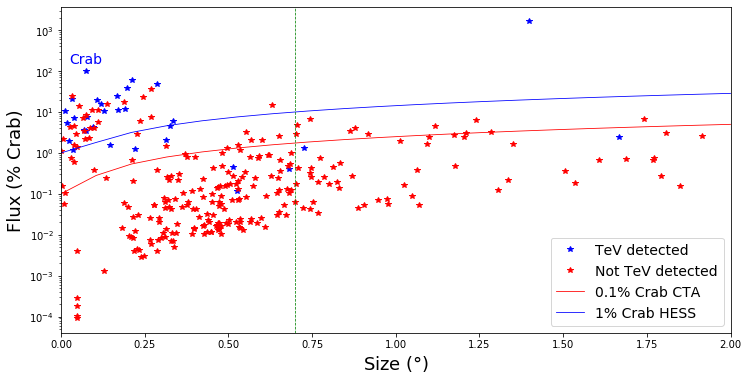

In [69]:
# We plot the Flux relative to the Crab against the size NORMALISED GOOD ONE
sizex = np.linspace(0.,2.,20)
fluxfunc = np.sqrt(sizex**2 + 0.07**2)
fluxfuncCTA = np.sqrt(sizex**2 + 0.04**2)

plt.rcParams['figure.figsize'] = (12, 6)

plt.semilogy(sizedeg[mask1], fluxrel[mask1]*100,'b*', label='TeV detected')
plt.semilogy(sizedeg[mask0], fluxrel[mask0]*100,'r*', label='Not TeV detected')
plt.semilogy(sizex, 0.1*0.04**(-1)*fluxfuncCTA,'r', linewidth = 0.8, label='0.1% Crab CTA')
plt.semilogy(sizex, 0.07**(-1) *fluxfunc,'b', linewidth = 0.8, label='1% Crab HESS')

#plt.title('Flux relative to the Crab against Size for pulsars younger than 500 kyr', fontsize=16)
plt.xlabel(r'Size ($\degree$)', fontsize=18)
plt.ylabel('Flux (% Crab)', fontsize=18)
plt.axvline(x=0.7, linewidth=0.75, linestyle="--", color='g')
plt.text(0.025,150,'Crab',color='blue',fontsize=14)


plt.xlim(0,2)
plt.legend(loc='best', fontsize=14)
plt.savefig("FluxSizePLOT.png")
#print(sizedeg)

print(len(sizedeg), len(fluxfunc))
#print(sizedeg, fluxfunc)

# Hess at 1 % Crab and CTA 0.1 % 
# Top 10 not yet Detected by HESS (top ten colser to the curve) 0.03 CTA
# find distance to line 
print(len(names[mask1]), len(names[mask0]), len(names), len(names[mask1]) + len(names[mask0]))

In [52]:
############################################### HESS CURVE ######################################################
# Function for obtaining the distance from the HESS curve to the points

def distanceH(sizee, fluxx):
    # For each point, difference between the flux (y axis) and the curve (substitute the x value in the equation)
    return fluxx - 0.07**(-1)*np.sqrt(sizee**2 + 0.07**2)

difference = np.zeros(len(names))
absdifference = np.zeros(len(names))

for i in range(0,len(names)):
    difference[i] = distanceH(sizedeg[i], fluxrel[i]*100)
    absdifference[i] = np.abs(difference[i])
    #print(fluxrel[i], 0.07**(-1)*np.sqrt(sizedeg[i]**2 + 0.07**2) )

# WE ORDER THE DIFFERENCE ARRAY FROM NEGATIVE TO POSITIVE
differencesort = np.sort(difference)
#print(differencesort)

# WE ORDER THE DIFFERENCE ARRAY FROM POSITIVE TO NEGATIVE
differenceupside = differencesort[::-1]
#print(differenceupside)

# ARRAY OF DIFFERENCE IN ABSOLUTE VALUE ORDERED FROM LEAST TO GREATEST
absdifference = np.sort(absdifference)
#print(absdifference)
################################################################################ 
# We take the pulsars above the HESS line (its difference is positive) but we only take those not yet Detected

geq = difference >= 0
geqnot = geq & mask0
#print(len(difference[geqnot]))
# We lok for their names
uppulsars = []
cc = 0
for i in range(0,len(names)):
    if difference[i] in difference[geqnot]:
        uppulsars = uppulsars + [names[i]]
        cc = cc + 1
        #print(cc)

print('The pulsars above the HESS line not yet detected are: \n', uppulsars)
print(cc)
print('Above HESS line and not detected: \n', names[geqnot])

# We read the data file 
data1 = np.genfromtxt('aboveHesslineNotTeVPWNnolabels.txt', dtype=np.str)
names1 = data1.T[0].astype(str) # Array of names
coincidence1 = data1.T[2].astype(np.float)# Array of Edot in erg/s
print(len(coincidence1), len(names1))
maskcoincidence1 = coincidence1 == 1
maskcoincidence10 = coincidence1 == 0

print('The ones between both curves NOT TeV detected which have a coincidence are: \n', names1[maskcoincidence10])
# ADD RADIUS AND RELFLUX

The pulsars above the HESS line not yet detected are: 
 ['J1400-6325', 'J1413-6141', 'J1050-5953', 'J1124-5916', 'J1048-5832', 'J0940-5428', 'J1550-5418', 'J1614-5048', 'J1632-4818', 'J1702-4310', 'J1708-4008', 'J1714-3810', 'J1726-3530', 'J1734-3333', 'J1740-3015', 'J1745-2900', 'J1746-2850', 'J1801-2451', 'J1808-2024', 'J1826-1256', 'J1841-0456', 'J1856+0113', 'J1907+0631', 'J1958+2846', 'J2021+3651', 'J2022+3842', 'J0501+4516', 'J2229+6114']
28
Above HESS line and not detected: 
 ['J1400-6325' 'J1413-6141' 'J1050-5953' 'J1124-5916' 'J1048-5832'
 'J0940-5428' 'J1550-5418' 'J1614-5048' 'J1632-4818' 'J1702-4310'
 'J1708-4008' 'J1714-3810' 'J1726-3530' 'J1734-3333' 'J1740-3015'
 'J1745-2900' 'J1746-2850' 'J1801-2451' 'J1808-2024' 'J1826-1256'
 'J1841-0456' 'J1856+0113' 'J1907+0631' 'J1958+2846' 'J2021+3651'
 'J2022+3842' 'J0501+4516' 'J2229+6114']
28 28
The ones between both curves NOT TeV detected which have a coincidence are: 
 ["'J1400-6325'" "'J1413-6141'" "'J1050-5953'" "'J1124-591

In [53]:
print(len(names[geq]))

50


In [54]:
for i in range(len(names[geqnot])):
        print(i, names[geqnot][i], np.log10(Edot[geqnot][i]), distance[geqnot][i], tau[geqnot][i])


0 J1400-6325 37.70757017609794 7000.0 12700.0
1 J1413-6141 35.7481880270062 8490.0 13600.0
2 J1050-5953 33.7481880270062 9000.0 2680.0
3 J1124-5916 37.079181246047625 5000.0 2850.0
4 J1048-5832 36.30102999566398 2900.0 20300.0
5 J0940-5428 36.27875360095283 380.0 42200.0
6 J1550-5418 35.0 4000.0 1410.0
7 J1614-5048 36.204119982655925 5150.0 7420.0
8 J1632-4818 34.68124123737559 5310.0 19800.0
9 J1702-4310 35.79934054945358 4320.0 17000.0
10 J1708-4008 32.763427993562935 3800.0 8900.0
11 J1714-3810 34.61278385671974 13200.0 1030.0
12 J1726-3530 34.544068044350276 4720.0 14500.0
13 J1734-3333 34.7481880270062 4460.0 8130.0
14 J1740-3015 34.91381385238372 400.0 20600.0
15 J1745-2900 34.11394335230683 8300.0 3400.0
16 J1746-2850 34.6232492903979 5610.0 12700.0
17 J1801-2451 36.414973347970815 3800.0 15500.0
18 J1808-2024 34.69897000433602 13000.0 218.0
19 J1826-1256 36.55630250076729 1550.0 14400.0
20 J1841-0456 32.99563519459755 9600.0 4570.0
21 J1856+0113 35.63346845557959 3300.0 20300.0

In [55]:
############################################### CTA CURVE ######################################################
# Function for obtaining the distance from the CTA curve to the points

def distanceCTA(sizee, fluxx):
    # For each point, difference between the flux (y axis) and the curve (substitute the x value in the equation)
    return fluxx - 0.1*0.04**(-1)*np.sqrt(sizee**2 + 0.04**2)

differenceCTA = np.zeros(len(names))
absdifferenceCTA = np.zeros(len(names))

for i in range(0,len(names)):
    differenceCTA[i] = distanceCTA(sizedeg[i], fluxrel[i]*100)
    absdifferenceCTA[i] = np.abs(differenceCTA[i])
    #print(fluxrel[i], 0.07**(-1)*np.sqrt(sizedeg[i]**2 + 0.07**2) )

# WE ORDER THE DIFFERENCE ARRAY FROM NEGATIVE TO POSITIVE
differencesortCTA = np.sort(differenceCTA)
#print(differencesort)
#print(differencesortCTA)

# WE ORDER THE DIFFERENCE ARRAY FROM POSITIVE TO NEGATIVE
differenceupsideCTA = differencesortCTA[::-1]
#print(differenceupside)

# ARRAY OF DIFFERENCE IN ABSOLUTE VALUE ORDERED FROM LEAST TO GREATEST
absdifferenceCTA = np.sort(absdifferenceCTA)
#print(absdifference)

################################################################################ 
# We take the pulsars between both curves, so negative difference in HESS and positive in CTA
print(len(difference), len(differenceCTA))
# Negative diff for HESS
leq = difference < 0
# Positive diff for CTA
geqCTA = differenceCTA > 0
# We apply both masks
middle = leq & geqCTA 

# We order the pulsars from closest to the upper curve (HESS) 
difference[middle]
# Order from negative to positivie
differencemiddlesort = np.sort(difference[middle])
# Flip order, from closest to farest
differencemiddlesort = differencemiddlesort[::-1]

print('Values of the distance of the pulsars between both curves to the HESS curve: \n', differencemiddlesort)
# Now we need to find their names
midpulsars = []
cc = 0
for i in range(0,len(names[middle])):
    for n in range(0,len(names)):
         if differencemiddlesort[i] == difference[n]:
            midpulsars = midpulsars + [names[n]]
            cc = cc + 1
print('\n Names of ALL the pulsars between both curves ordered from closest distance to HESS curve: \n', midpulsars)
print('\n', len(names[middle]), len(differencemiddlesort))

# ADD FILTERS MASK0 AND MASK1

discov = middle & mask1
notdiscov = middle & mask0

print('\n Names of  discovered pulsars between both curves ordered from closest distance to HESS curve: \n',names[discov])
print('\n Names of NOT discovered pulsars between both curves ordered from closest distance to HESS curve: \n', names[notdiscov])
print(len(names[discov]), len(names[notdiscov]))

# We read the data file 
data2 = np.genfromtxt('middleHessCTAlinesNotTeVPWNfillednolabels.txt', dtype=np.str)
names2 = data2.T[0].astype(str) # Array of names
coincidence2 = data2.T[2].astype(np.float)# Array of Edot in erg/s
print(len(coincidence2))
maskcoincidence2 = coincidence2 == 1
maskcoincidence20 = coincidence2 == 0

print('The ones between both curves NOT TeV detected which have a coincidence are: \n', names2[maskcoincidence20])


304 304
Values of the distance of the pulsars between both curves to the HESS curve: 
 [ -0.18737933  -0.349149    -0.48011394  -0.54068382  -0.76677258
  -0.843759    -0.97036686  -1.34249956  -2.0851529   -2.51873027
  -2.55168902  -3.13784253  -4.0166578   -4.466719    -4.64963429
  -5.34965414  -5.81489026  -6.0682749   -6.16757138  -6.60053436
  -6.78740361  -7.22192742  -8.54173507  -8.98764077 -10.24073525
 -11.27138477 -11.52538647 -14.2148302  -18.29811206 -25.32220128
 -42.83455034 -68.52996402]

 Names of ALL the pulsars between both curves ordered from closest distance to HESS curve: 
 ['J1826-1334', 'J1341-6220', 'J1935+2025', 'J2004+3429', 'J1856+0245', 'J0540-6919', 'J2337+6151', 'J1934+2352', 'J1838-0655', 'J1909+0749', 'J1811-1925', 'J1622-4950', 'J1747-2958', 'J1821-1419', 'J1730-3350', 'J2238+5903', 'J1837-0604', 'J1112-6103', 'J1841-0524', 'J1718-3718', 'J1809-1943', 'J1524-5625', 'J0729-1448', 'J1015-5719', 'J1813-1246', 'J1044-5737', 'J0631+1036', 'J1429-5911', 'J

In [56]:
######################################### PULSARS BELOW CTA CURVE BUT DETECTED ############################################
# (The blue ones)
# We need to add mask1 and the following one
leqCTA = differenceCTA < 0
belowblue = mask1 & leqCTA
print(names[belowblue])
print(len(names[belowblue]))
print(fluxrel[belowblue]*100)
print(differenceCTA[belowblue])


print('\n Size of the low pulsars:', sizedeg[belowblue],'\n Flux of them: ', fluxrel[belowblue]*100)
print('\n There are six but one has size 12 degrees, \n so we get rid of it and the 5 ones are:', names[belowblue][0:5])
print('   Name           ', 'Size (deg)           ', 'Flux % Crab')
for m in range(0,len(names[belowblue])):
    print(names[belowblue][m],'   ', sizedeg[belowblue][m],'   ', fluxrel[belowblue][m]*100)

['J1028-5819' 'J1718-3825' 'J1809-1917' 'J1833-0827' 'J1857+0143'
 'J0633+1746']
6
[ 2.46343709  0.40970793  1.29965393  0.11576556  0.44115482 12.49836273]
[ -1.70437405  -1.29730531  -0.51619872  -1.20381377  -0.85146526
 -18.65822311]

 Size of the low pulsars: [ 1.66664452  0.68163265  0.72523881  0.52631391  0.51549847 12.46257014] 
 Flux of them:  [ 2.46343709  0.40970793  1.29965393  0.11576556  0.44115482 12.49836273]

 There are six but one has size 12 degrees, 
 so we get rid of it and the 5 ones are: ['J1028-5819' 'J1718-3825' 'J1809-1917' 'J1833-0827' 'J1857+0143']
   Name            Size (deg)            Flux % Crab
J1028-5819     1.6666445198555582     2.46343709262072
J1718-3825     0.6816326506418732     0.40970792675472745
J1809-1917     0.7252388129929391     1.2996539303240395
J1833-0827     0.5263139149547472     0.1157655571164975
J1857+0143     0.5154984659351842     0.44115482180328974
J0633+1746     12.462570143238509     12.498362726033099


In [57]:
# Mask for sizedeg between 0 and 2 (the ones that appear in the plot)
sizeinplot1 = 0 <= sizedeg
sizeinplot2 = sizedeg <= 2
sizeinplot = sizeinplot1 & sizeinplot2
sizenotinplot = np.logical_not(sizeinplot)
print('Number of pulsars in the plot:', len(sizedeg[sizeinplot]))
print('Number of  total pulsars:', len(sizedeg))
print('Number of pulsars NOT in the plot:', len(sizedeg) - len(sizedeg[sizeinplot]), len(sizedeg[sizenotinplot]))
print('Size in degrees of these pulsars:\n', sizedeg[sizenotinplot])



Number of pulsars in the plot: 286
Number of  total pulsars: 304
Number of pulsars NOT in the plot: 18 18
Size in degrees of these pulsars:
 [ 2.49855284  5.73932073  7.85463729  7.84932104  5.46557136  6.23992212
  4.61068864  2.36231587  6.36210935  3.68150031  2.27914038  2.67753636
  7.85504505  7.85448323  2.13589481  8.12691328 12.46257014  3.35744188]


In [58]:
sizedeg[cr]

0.07430620122427337

[9.24884719e-05 5.00008786e+00 1.00000832e+01 1.50000786e+01
 2.00000740e+01 2.50000694e+01 3.00000647e+01 3.50000601e+01
 4.00000555e+01 4.50000509e+01 5.00000462e+01 5.50000416e+01
 6.00000370e+01 6.50000324e+01 7.00000277e+01 7.50000231e+01
 8.00000185e+01 8.50000139e+01 9.00000092e+01 9.50000046e+01
 1.00000000e+02]
21
(array([ 3.,  1.,  0.,  1.,  1.,  8., 18., 31., 24., 30., 31., 27., 22.,
       17., 27., 23., 18., 12.,  5.,  2.]), array([9.24884719e-05, 1.85260667e-04, 3.71089652e-04, 7.43317681e-04,
       1.48891561e-03, 2.98239871e-03, 5.97394641e-03, 1.19662189e-02,
       2.39691461e-02, 4.80118214e-02, 9.61709269e-02, 1.92636874e-01,
       3.85864693e-01, 7.72913088e-01, 1.54819721e+00, 3.10114377e+00,
       6.21180081e+00, 1.24426573e+01, 2.49234845e+01, 4.99234259e+01,
       1.00000000e+02]), <a list of 20 Patch objects>)
301
301


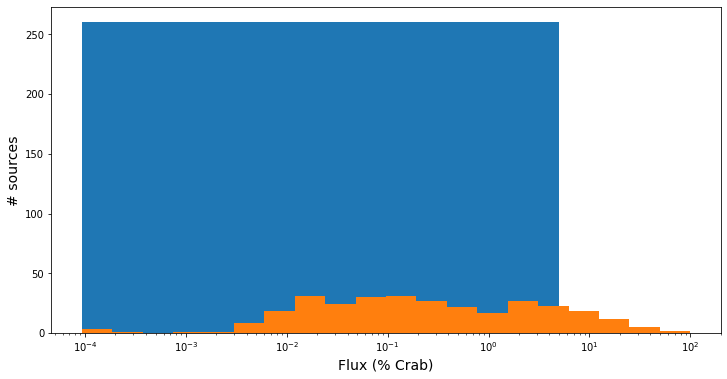

In [59]:
#plt.hist(fluxrel*100,bins=20)
#plt.xticks(np.log10([0.01, 0.1, 1 ,10, 100 ]))
###########################################################################################################
##################### HISTOGRAM OF RELATIVE FLUX IN LOG SCALE #########################################
hist, bins, _ = plt.hist(fluxrel[fluxleq1]*100, bins=20)
print(bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
print(len(logbins))
#plt.subplot(212)
#plt.title("")
print(plt.hist(fluxrel*100, bins=logbins))
plt.xscale('log')
plt.xlabel(r"Flux (% Crab)", fontsize = 14)
plt.ylabel(r"# sources", fontsize = 14)
#plt.xlim(1,150)
#plt.savefig("fluxpercenthistALLpulsars.png")
#plt.show()
print(len(fluxrel[fluxleq1]))
#plt.savefig("fluxpercenthist.png")
print(len(fluxrel[fluxleq1]))

In [60]:
check = ['J0940-5428', 'J1048-5832', 'J1135-6055', 'J1209-6238', 'J1524-5625', 'J1730-3350', 
         'J1747-2958', 'J1837-0604', 'J2022+3842', 'J2111+4606']
for i in range(0,len(names)):
    if names[i] in check:
        print(i)

53
67
75
138
150
201
286


In [61]:
checkv = [53, 67, 75, 138, 150, 201, 286]
for c in checkv:
    print(names[c], sizedeg[c], flux[c], fluxrel[c])
    

J1048-5832 0.2705566361598498 6.791077972890371e+29 0.07604832735191584
J1524-5625 0.7019706312084463 2.550358809371769e+29 0.028559607528316853
J0940-5428 6.239922116144322 1.3164261346199382e+31 1.4741695798492696
J1730-3350 0.5514343924382445 2.93904053802123e+29 0.03291217061977878
J1747-2958 0.7428349302650045 5.931525316078899e+29 0.06642282429005267
J1837-0604 0.49579550892315793 1.1949595431741803e+29 0.013381480064633747
J2022+3842 0.03990680147929637 1.415140203137784e+29 0.0158471226286443


(2,)


<Figure size 864x432 with 0 Axes>

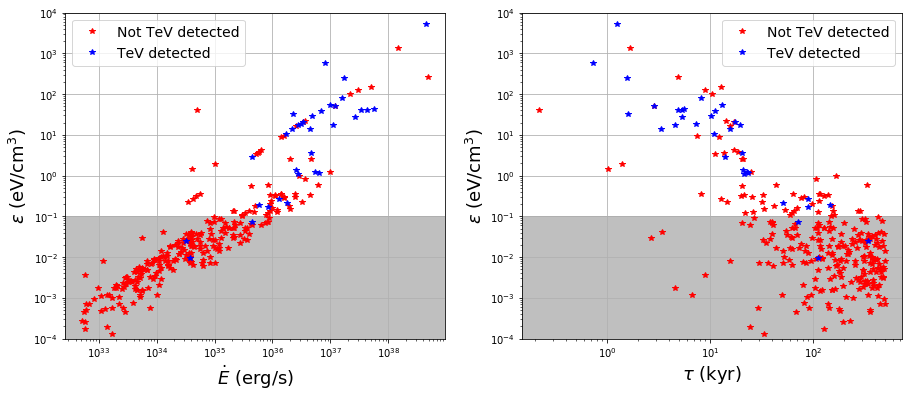

In [62]:
################################## ENERGY DENSITY HALO PAPER #############################################3

plt.subplots_adjust(hspace=0.0001)

f, axs = plt.subplots(1,2,figsize=(15,6))
print(np.shape(axs))

# Density Edot diagram
#plt.subplot(221,figsize=(16,8))
axs[0].loglog(Edot[mask0], epsilon[mask0],'r*', label = 'Not TeV detected')
axs[0].loglog(Edot[mask1], epsilon[mask1],'b*', label = 'TeV detected')
#axs[0].set_title('Energy density as a function of Edot', fontsize=14)
axs[0].set_ylabel(r'$\varepsilon$ (eV/cm$^3$)', fontsize=18)
axs[0].set_xlabel(r'$\dot{E}$ (erg/s)', fontsize=18)
#axs[0].set_xlim(10**33, 10**39)
#axs[0].set_xlim(left=None, right=None, emit=True, auto=False, xmin=10**33, xmax=10**39)
axs[0].axhspan(0.0001, 0.1, alpha=0.5, color='grey')
axs[0].set_ylim([0.0001, 10000])
axs[0].grid(True)
axs[0].legend(loc='best', fontsize=14)


# Density tau diagram
#plt.subplot(222)
axs[1].loglog(tau[mask0]*10**(-3), epsilon[mask0],'r*', label = 'Not TeV detected')
axs[1].loglog(tau[mask1]*10**(-3), epsilon[mask1],'b*', label = 'TeV detected')
#axs[1].set_title(r'Energy density as a function of $\tau_c$', fontsize=14)
axs[1].set_ylabel(r'$\varepsilon$ (eV/cm$^3$)', fontsize=18)
axs[1].set_xlabel(r'$\tau$ (kyr)', fontsize=18)
#axs[0].set_xscale(0.1, 10**2)
   
#axs[0].axvspan(8, 14, ymin=0.1, ymax=0.9, alpha=0.5, color='red')
axs[1].axhspan(0.0001, 0.1, alpha=0.5, color='grey')
axs[1].set_ylim([0.0001, 10000])
axs[1].grid(True)
axs[1].legend(loc='best', fontsize=14)

plt.savefig('Haloplots2GOOD.png')

In [63]:
####################################### NAMES OF PULSAR BELOW THE LINE (HALO) #######################################33
maskH1 = epsilon < 0.1

#print(names[maskH1])
print('The percentage of pulsars below 0.1 is:', len(names[maskH1])/len(names)*100 ,'%' )
print(len(names[maskH1]))
print('Mean of age for pulsars below 0.1 is:', np.mean(tau[maskH1]))
print('Mean of Edot for pulsars below 0.1 is:', np.mean(Edot[maskH1]))
halodetected = maskH1 * mask1
print('Pulsars detected as Halo:', names[halodetected])
print('Edot of pulsars detected as Halo:', Edot[halodetected])
print('Age (kyr) of pulsars detected as Halo:', tau[halodetected]*10**(-3))
print('Energy density of pulsars detected as Halo:', epsilon[halodetected])


The percentage of pulsars below 0.1 is: 70.72368421052632 %
215
Mean of age for pulsars below 0.1 is: 218165.62790697673
Mean of Edot for pulsars below 0.1 is: 7.424823255813953e+34
Pulsars detected as Halo: ['J1857+0143' 'J0659+1414' 'J0633+1746']
Edot of pulsars detected as Halo: [4.5e+35 3.8e+34 3.2e+34]
Age (kyr) of pulsars detected as Halo: [ 71. 111. 342.]
Energy density of pulsars detected as Halo: [0.07352178 0.00979187 0.02539456]


In [64]:
print(names[halodetected])
print(Edot[halodetected])
print(tau[halodetected]*10**(-3))
print(epsilon[halodetected])

['J1857+0143' 'J0659+1414' 'J0633+1746']
[4.5e+35 3.8e+34 3.2e+34]
[ 71. 111. 342.]
[0.07352178 0.00979187 0.02539456]


(-2.3, 1.1)

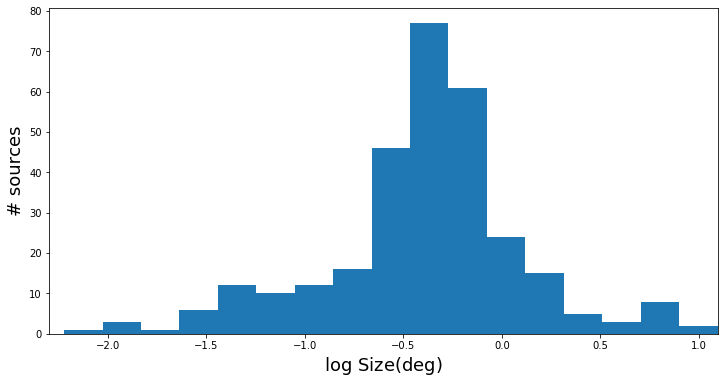

In [65]:

plt.hist(np.log10(sizedeg), bins = 20)
plt.ylabel(r'# sources', fontsize = 18)
plt.xlabel(r'$\log$ Size(deg)', fontsize = 18)
#plt.title('Size histogram', fontsize = 16)
plt.xlim(-2.3,1.1)
#plt.savefig('Size_histogramGOOD.png')

In [66]:
# AGE OF CRAB
P[cr]/(2*Pdot[cr]*3600*24*365) 

1257.6447458133819